# Fire up pandas create

In [1]:
import pandas as pd
from pandas import DataFrame
from matplotlib.pylab import plt

#Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
sales = pd.read_csv('kc_house_prices_data.csv')

In [3]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

In [4]:
sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


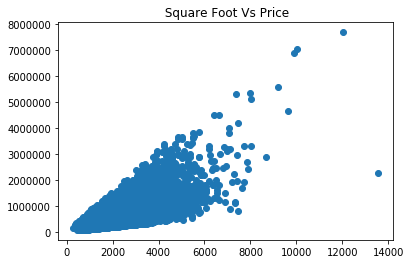

In [5]:
#plt.plot(sales['sqft_living'],sales['price'] )
plt.scatter(sales.sqft_living, sales.price)
plt.title(" Square Foot Vs Price")
plt.show()

# Create a simple regression model

Split data into training and testing.  
We use seed=2 so that everyone running this notebook gets the same results.  In practice, you may set a random seed.  

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
reg_model = LinearRegression()

In [8]:
labels = sales['price']
conv_dates = [1 if values == 2014 else 0 for values in sales.date]
sales['date'] = conv_dates
feature1 = sales['sqft_living']
trainData = sales.drop(['id','price'],axis=1)
#print(sales['date'])
#print(labels)
#print(trainData)

In [9]:
from sklearn.cross_validation import train_test_split

/home/shahid/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(trainData, labels, test_size = 0.20, random_state=2)

In [11]:
reg_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
score = reg_model.score(x_test,y_test)
print(score)

0.715615293857


In [13]:
print(reg_model.intercept_)

7726248.15187


In [14]:
print(reg_model.coef_)  # co efficient

[  0.00000000e+00  -3.59678558e+04   3.98107855e+04   1.13315005e+02
   9.72319678e-02   9.17165471e+03   5.72806911e+05   5.15223111e+04
   2.69867684e+04   9.38983746e+04   7.01584033e+01   4.31566016e+01
  -2.59846809e+03   2.36569924e+01  -5.97926288e+02   6.08814891e+05
  -2.16057115e+05   2.12062598e+01  -3.34013558e-01]


# Make Prediction 

In [16]:
y_pred = reg_model.predict(x_test)
print(y_pred)

[  714313.29153169  1422462.39996591   419806.56361438 ...,
   522114.84515215   174723.95094935   260992.92524142]


# compare the actual output values for X_test with the predicted values,

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
6638,735000.0,7.143133e+05
7366,1150000.0,1.422462e+06
3158,350500.0,4.198066e+05
9117,860000.0,1.288337e+06
3392,122000.0,-3.394489e+04


# Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

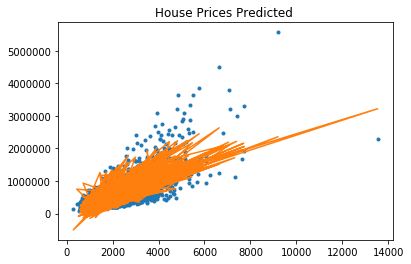

In [20]:
#plt.plot(test_data['sqft_living'],test_data['price'],'.',
 #       test_data['sqft_living'],sqft_model.predict(test_data),'-')
plt.plot(x_test['sqft_living'],y_test, '.', 
         x_test['sqft_living'], y_pred,'-')
plt.title("House Prices Predicted ")
plt.show()

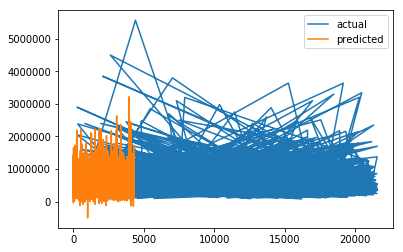

In [21]:
plt.plot(y_test,label="actual")
plt.plot(y_pred, label="predicted")
plt.legend()
plt.show()

#Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [22]:
my_features = sales[['sqft_living','bedrooms']]

In [23]:
my_features.describe()

,sqft_living,bedrooms
count,21613.000000,21613.000000
mean,2079.899736,3.370842
std,918.440897,0.930062
min,290.000000,0.000000
25%,1427.000000,3.000000
50%,1910.000000,3.000000
75%,2550.000000,4.000000
max,13540.000000,33.000000


# Build a regression model with one feature

In [24]:
reg_model1 = LinearRegression()

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(my_features, labels, test_size = 0.20, random_state=2)

In [26]:
reg_model1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
print (feature1.head())

0    1180
1    2570
2     770
3    1960
4    1680
Name: sqft_living, dtype: int64


##Comparing the results of the simple model with adding more features

In [28]:
print (reg_model.score(x_test,y_test))
print (reg_model1.score(X_test,Y_test))

0.715615293857
0.516584228494


The RMSE goes down with more features.

# Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [29]:
#print(sales)
house1 = sales[sales['id']== 5309101200]

In [30]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,0,620000.0,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


<img src="http://info.kingcounty.gov/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [31]:
print (house1['price'])

1054    620000.0
Name: price, dtype: float64


In [32]:
#print(reg_model.predict(house1))

In [33]:
#print (reg_model1.predict(house1))

In this case, the model with more features provides a better prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

##Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [34]:
house2 = sales[sales['id']==1925069082]

In [35]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,0,2200000.0,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [36]:
#print (reg_model.predict(house2['price'].values.reshape(1,-1)))

In [37]:
#print (reg_modelq.predict(house2))

In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

##Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [38]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [89]:
#print (reg_model.predict(pd.isnull(bill_gates)))